In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import scale 

from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Advanced Analysis
from sklearn.model_selection import StratifiedShuffleSplit

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, plot_importance

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

from sklearn.inspection import PartialDependenceDisplay

In [2]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
#After analyzing for outliers, these 2 observations are deleted (In Income Var)
df.drop(labels=[3896, 4993],axis=0,inplace=True)

In [4]:
dummy_col = ['Securities Account',
       'CD Account', 'Online', 'CreditCard']
df2 =pd.get_dummies(data = df, columns = dummy_col)

In [5]:
df2.query('Experience < 0')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
89,90,25,-1,113,94303,4,2.30,3,0,0,1,0,1,0,1,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,1,0,1,0,1,0,1,0
315,316,24,-2,51,90630,3,0.30,3,0,0,1,0,1,0,0,1,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,1,0,1,0,0,1,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,1,0,1,0,0,1,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,1,0,1,0,0,1,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,1,0,1,0,0,1,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,1,0,1,0,1,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,1,0,1,0,0,1,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,0,1,1,0,1,0,0,1


In [6]:
#Convert Negative Values in Experience into Positive
df2['Experience']=df2['Experience'].apply(lambda x :abs(x))

In [7]:
label_encoder = LabelEncoder()
df2['Education_encoded'] = label_encoder.fit_transform(df2['Education'])
df2 = df2.drop('Education', axis = 1)
df2.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1,Education_encoded
0,1,25,1,49,91107,4,1.6,0,0,0,1,1,0,1,0,1,0,0
1,2,45,19,34,90089,3,1.5,0,0,0,1,1,0,1,0,1,0,0
2,3,39,15,11,94720,1,1.0,0,0,1,0,1,0,1,0,1,0,0
3,4,35,9,100,94112,1,2.7,0,0,1,0,1,0,1,0,1,0,1
4,5,35,8,45,91330,4,1.0,0,0,1,0,1,0,1,0,0,1,1


# Advanced Analysis

In [9]:
X = df2.drop('Personal Loan', axis = 1)
y = df2[['Personal Loan']]

# Set the number of splits (you can adjust this)
n_splits = 1

# Initialize StratifiedShuffleSplit
stratified_splitter = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)

# Perform the split
for train_index, test_index in stratified_splitter.split(X, y):
    trainx, testx = X.iloc[train_index], X.iloc[test_index]
    trainy, testy = y.iloc[train_index], y.iloc[test_index]

In [10]:
oversample = SMOTE(random_state=0)
smote_x , smote_y = oversample.fit_resample(trainx , trainy)

# Display the class distribution after SMOTE
print(smote_y.value_counts())

Personal Loan
0                3614
1                3614
dtype: int64


In [11]:
label_encoder = LabelEncoder()

# Convert string labels to numerical labels
testy_encoded = label_encoder.fit_transform(testy)
trainy_encoded = label_encoder.fit_transform(trainy)

xgb_model = XGBClassifier()

# Train the classifier on the training data
xgb_model.fit(trainx, trainy_encoded)

xgb_pred = xgb_model.predict(testx)

# Classification report
print("Classification Report:")
print(classification_report(testy_encoded, xgb_pred))

C:\Users\Isini\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Isini\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       0.96      0.97      0.96        96

    accuracy                           0.99      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000



In [12]:
xgb_trainpred = xgb_model.predict(trainx)

# Classification report
print("Classification Report:")
print(classification_report(trainy_encoded, xgb_trainpred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3614
           1       1.00      1.00      1.00       384

    accuracy                           1.00      3998
   macro avg       1.00      1.00      1.00      3998
weighted avg       1.00      1.00      1.00      3998



<Figure size 2000x1000 with 0 Axes>

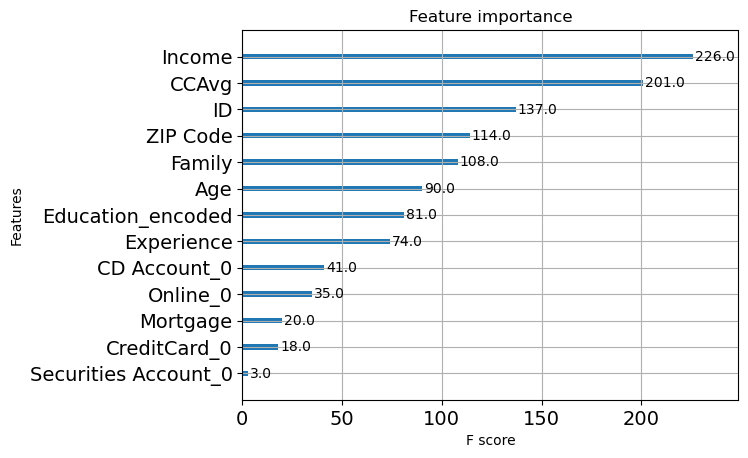

In [13]:
plt.figure(figsize=(20, 10))
plot_importance(xgb_model)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

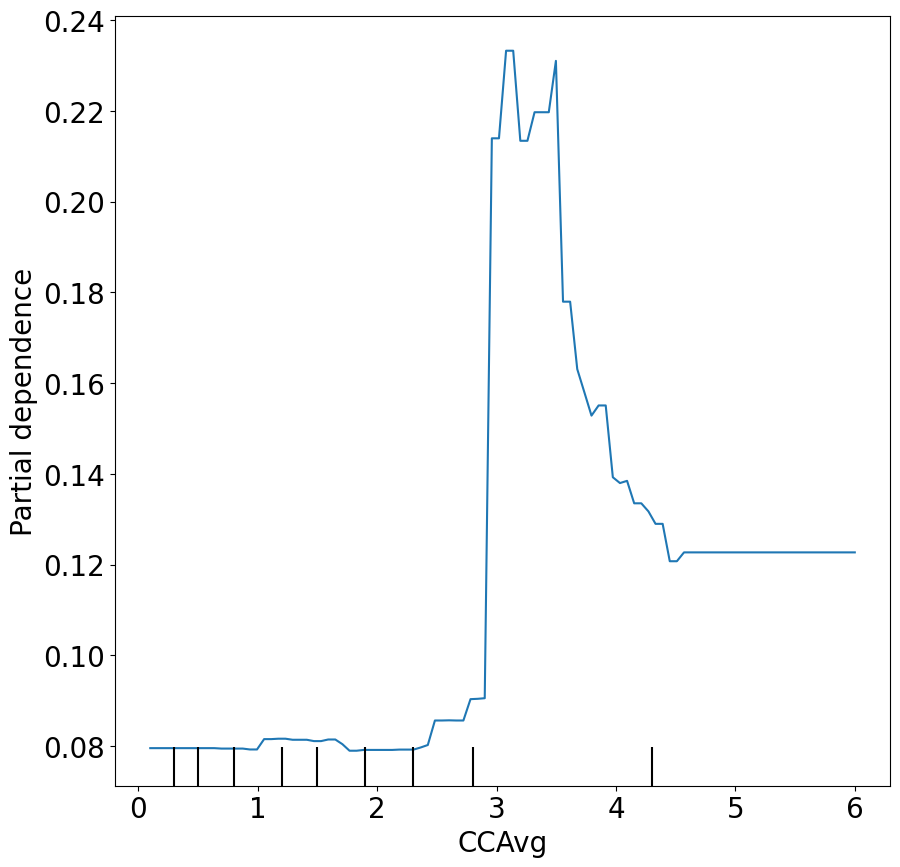

In [14]:
features = ['CCAvg']
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('font', size=20)
one=PartialDependenceDisplay.from_estimator(xgb_model, trainx, features = features,ax=ax)
plt.savefig('0.png',dpi=300)

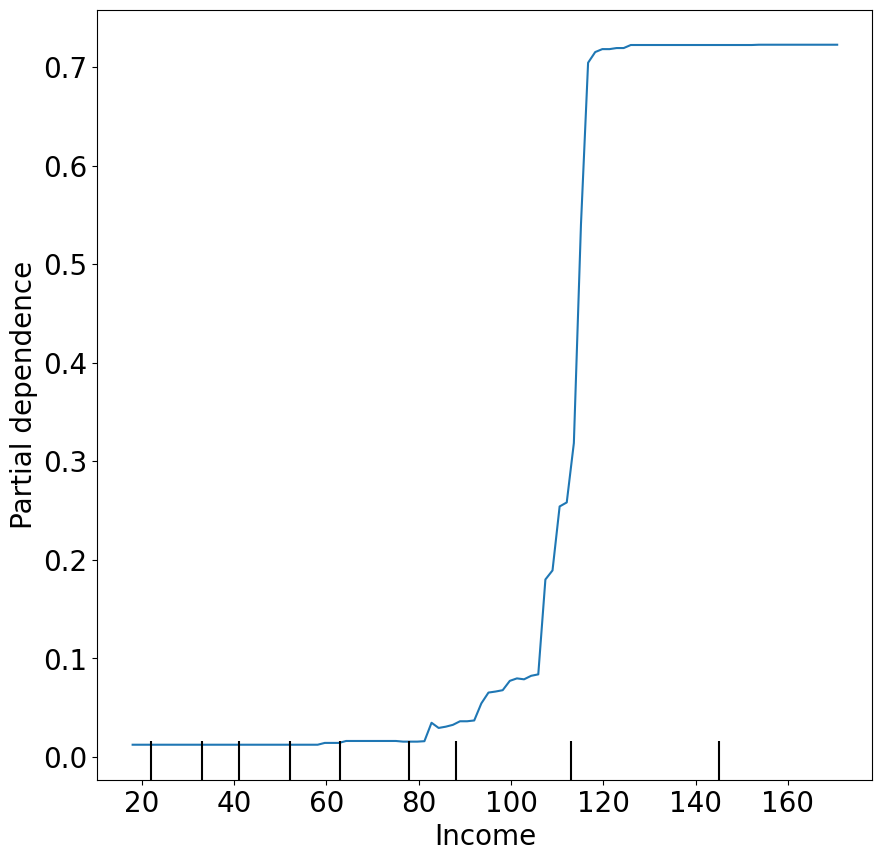

In [15]:
features = ['Income']
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('font', size=20)
one=PartialDependenceDisplay.from_estimator(xgb_model, trainx, features = features,ax=ax)
plt.savefig('0.png',dpi=300)

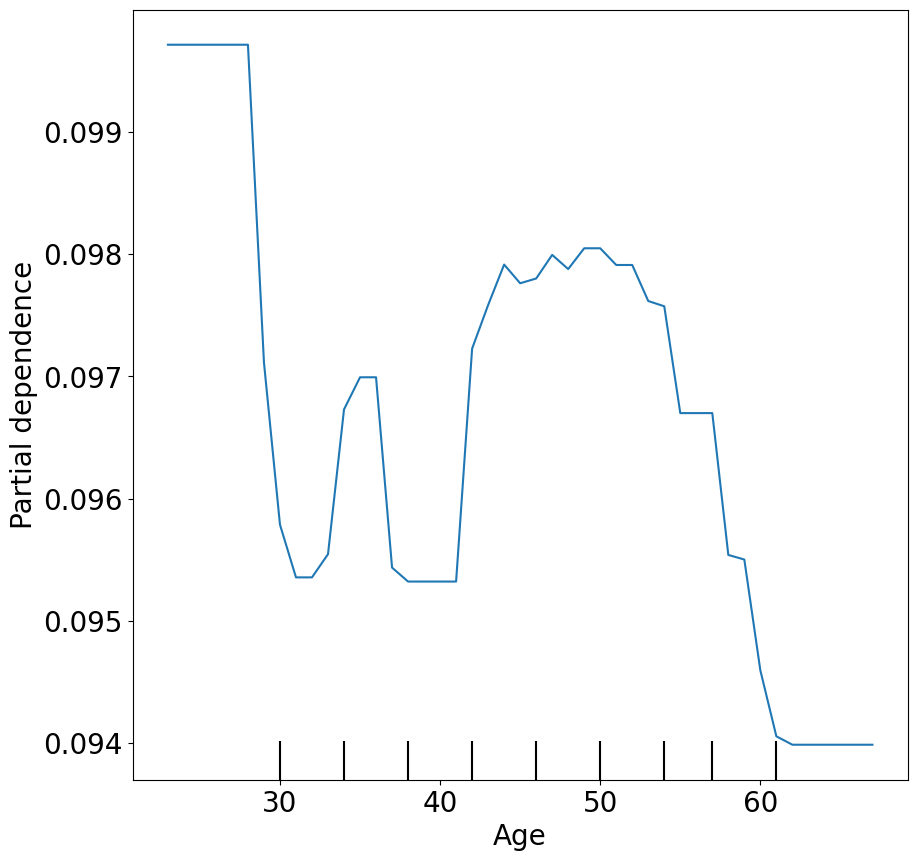

In [16]:
features = ['Age']
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('font', size=20)
one=PartialDependenceDisplay.from_estimator(xgb_model, trainx, features = features,ax=ax)
plt.savefig('0.png',dpi=300)

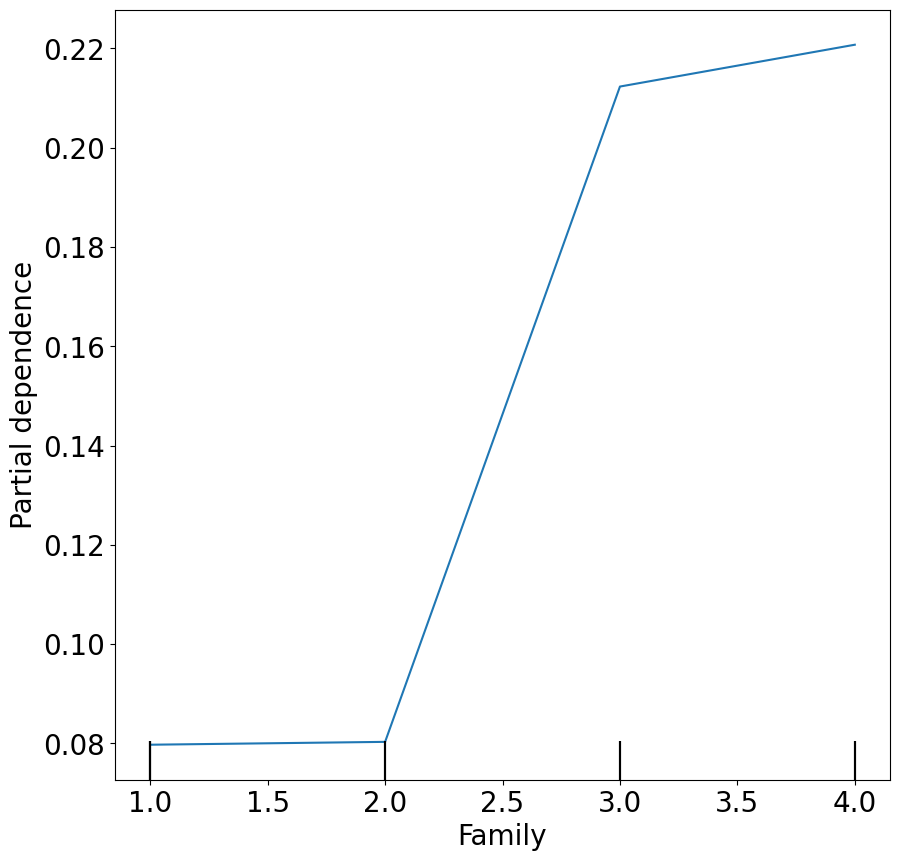

In [17]:
features = ['Family']
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('font', size=20)
one=PartialDependenceDisplay.from_estimator(xgb_model, trainx, features = features,ax=ax)
plt.savefig('0.png',dpi=300)

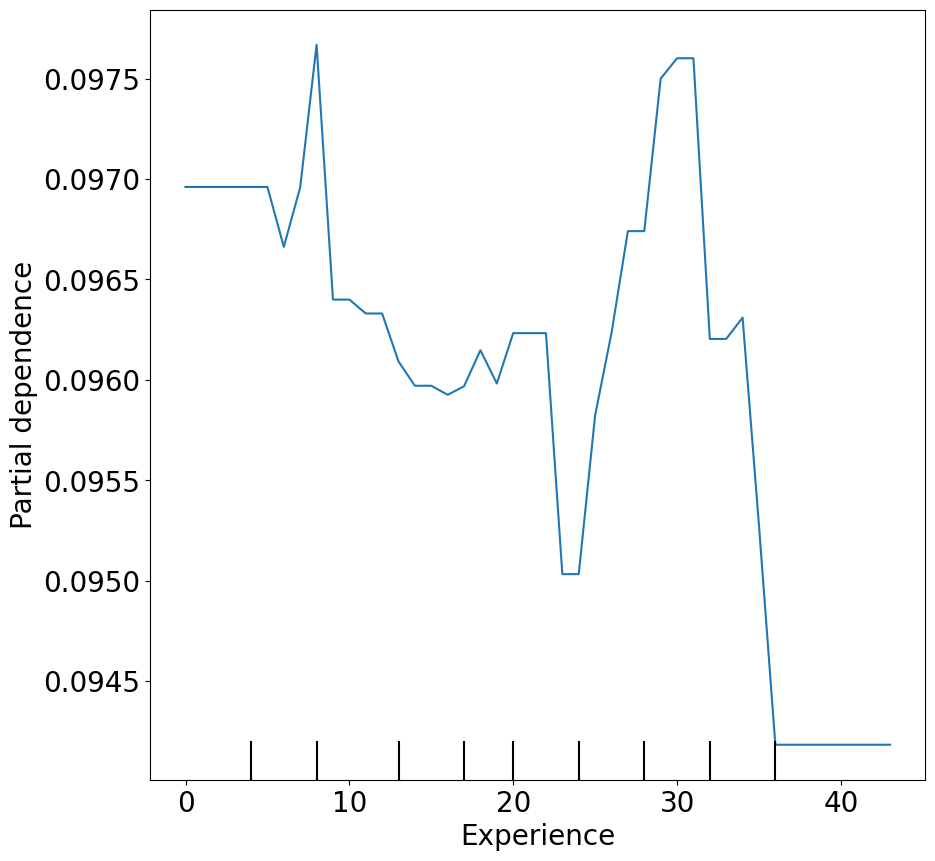

In [18]:
features = ['Experience']
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('font', size=20)
one=PartialDependenceDisplay.from_estimator(xgb_model, trainx, features = features,ax=ax)
plt.savefig('0.png',dpi=300)

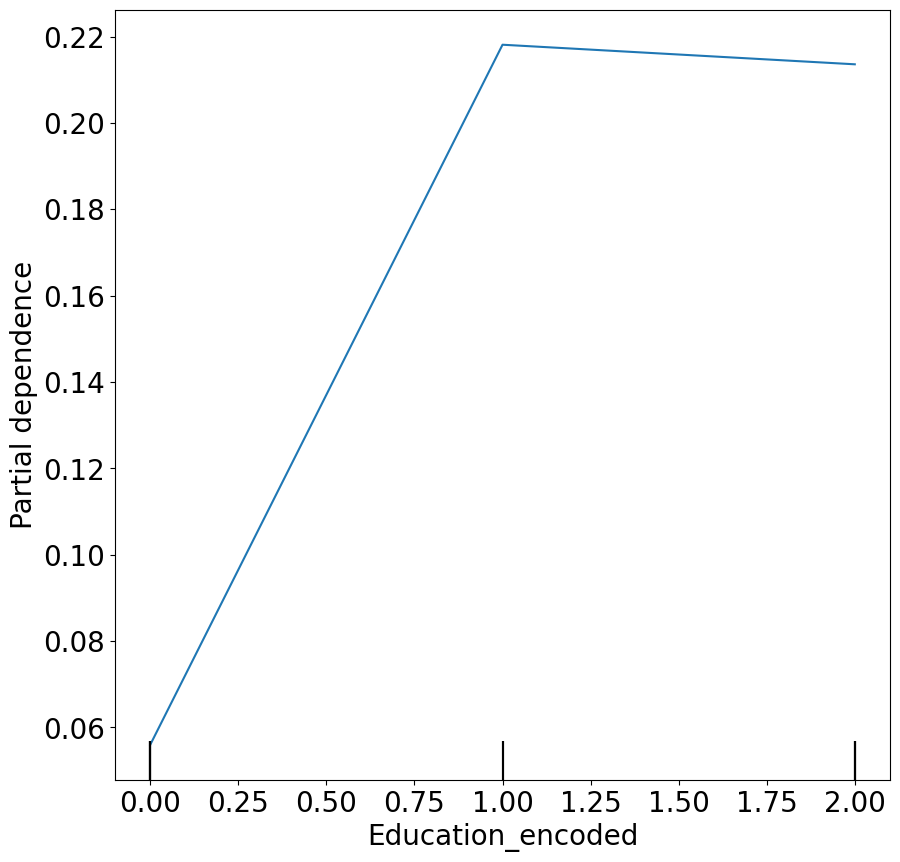

In [19]:
features = ['Education_encoded']
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('font', size=20)
one=PartialDependenceDisplay.from_estimator(xgb_model, trainx, features = features,ax=ax)
plt.savefig('0.png',dpi=300)